In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('Forecast_eval_hk4004u(30).csv')
df["date"] = pd.to_datetime(df["date"])
df.iloc[0:58,:]
#df=df.dropna()
df.set_index('date',inplace=True)
df


,HK4004U,HK4004U_60_pred,HK4004U_30_pred,HK4004U_15_pred,HK4004U_7_pred
date,,,,,
2020-11-21,19.83,19.487314,19.651648,19.818419,19.698940
2020-11-22,19.93,19.489620,19.832380,19.787647,19.717650
2020-11-23,19.88,19.491798,19.828440,19.761938,19.716436
2020-11-24,19.84,19.492777,19.806032,19.742123,19.730116
2020-11-25,19.90,19.499372,19.776960,19.725979,19.742615
2020-11-26,19.86,19.613290,19.779842,19.714426,19.810646
2020-11-27,19.84,19.644695,19.768091,19.704046,19.834980
2020-11-28,19.82,19.631110,19.796337,19.700535,NaN
2020-11-29,19.79,19.608389,19.825077,19.698940,NaN


In [4]:
df.corr(method='pearson')

,HK4004U,HK4004U_60_pred,HK4004U_30_pred,HK4004U_15_pred,HK4004U_7_pred
HK4004U,1.000000,-0.393500,0.456879,0.019950,-0.263848
HK4004U_60_pred,-0.393500,1.000000,-0.447429,-0.454033,0.978093
HK4004U_30_pred,0.456879,-0.447429,1.000000,0.108947,0.090573
HK4004U_15_pred,0.019950,-0.454033,0.108947,1.000000,-0.843001
HK4004U_7_pred,-0.263848,0.978093,0.090573,-0.843001,1.000000


In [549]:
import matplotlib as mpl # to plot figures 
import matplotlib.pyplot as plt
df[['HK4004U','HK4004U_60_pred']].plot()
#df[['HK4004U','HK4004U_pred_60(1)']].plot()
df[['HK4004U','HK4004U_30_pred']].plot()
df[['HK4004U','HK4004U_15_pred']].plot()

KeyError: "['HK4004U_60_pred'] not in index"

In [558]:

df_input = df[['HK4004U','HK4004U_60_pred']]
#df_input.fillna('ffill')
# 
df_input.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2020-11-21 to 2021-01-19
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HK4004U          60 non-null     float64
 1   HK4004U_60_pred  60 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [559]:
df_input.corr(method='pearson')

,HK4004U,HK4004U_60_pred
HK4004U,1.000000,-0.165365
HK4004U_60_pred,-0.165365,1.000000


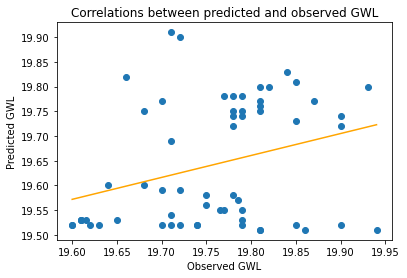

In [532]:
x =df_input['HK4004U']
y= df_input['HK4004U_60_pred']
np.corrcoef(x,y)
plt.scatter(x,y)
plt.title('Correlations between predicted and observed GWL')
plt.xlabel('Observed GWL')
plt.ylabel('Predicted GWL')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)),color="orange")
plt.show()

In [533]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error, r2_score
X  = df_input[['HK4004U']]
Y = df_input[['HK4004U_60_pred']]
#X,Y= np.array(X), np.array(Y)
rmse= (sqrt(mean_squared_error(X,Y)))
rmse
r2 = r2_score(X,Y)
r2
rmse, r2


(0.1712393549002873, -2.900148801414293)

In [534]:
x_values = df_input['HK4004U']
y_values = df_input['HK4004U_60_pred']
    
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.09731013926756694
